首先安装 pytorch

In [6]:
!pip install torch torchvision

    100% |████████████████████████████████| 484.0MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b774000 @  0x7f9bdbea51c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 12.7MB/s 
    100% |████████████████████████████████| 2.0MB 14.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


pytorch 首先是 tensor （n维数组）的计算库

In [0]:
import torch
x = torch.Tensor([1.0, 2.0, 3.0]) # vector (1d)
y = x ** x
y

tensor([  1.,   4.,  27.])

In [0]:
import torch
x = torch.Tensor([
    [1.0, 2.0, 3.0], 
    [1.0, 2.0, 3.0]
]) # matrix (2d)
y = x ** x
y

tensor([[  1.,   4.,  27.],
        [  1.,   4.,  27.]])

In [0]:
import torch
x = torch.Tensor([
    [[1.0], [2.0], [3.0]], 
    [[1.0], [2.0], [3.0]]
]) # tensor (more than 2d)
y = x ** x
y

tensor([[[  1.],
         [  4.],
         [ 27.]],

        [[  1.],
         [  4.],
         [ 27.]]])

相比 numpy 来说 pytorch 把类似的编程体验扩展到了 GPU 计算上。只需要调用 cuda 这个函数就可以了。

In [0]:
import torch
x = torch.Tensor([1.0, 2.0, 3.0]).cuda() # 这个运行在 GPU 上
y = x ** x
y

tensor([  1.,   4.,  27.], device='cuda:0')

pytorch 除了可以用来做 tensor 的运算之外，还可以对计算过程进行自动求导数（也就是梯度）

In [12]:
import torch
import matplotlib.pylab as plt

x = torch.Tensor([3.0])
x.requires_grad_(True) # Tensor 默认不追踪其的梯度
y = x * x
y.backward(torch.ones(len(x)))
x.grad

tensor([ 6.])

计算梯度出来的梯度可以用于梯度下降算法，其目的是把函数的结果往目标靠近。

比如 f(x) = y

为了把结果y向目标靠近，我们可以通过梯度计算去修改 x 或者修改 f。
下面我们看一下给定f的情况下，修改x的情况

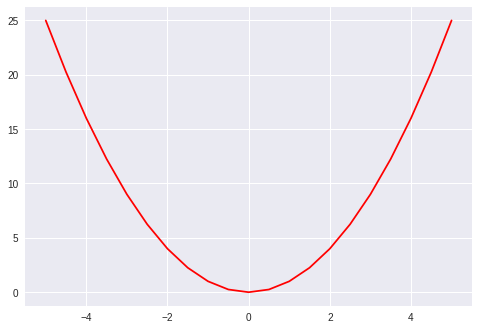

In [0]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-5, 5, 21)
y = x * x
plt.plot(x, y, 'r')

假设初始的情况是这样的

In [0]:
import torch

x = torch.Tensor([1.0])
y = x * x
target = torch.Tensor([10.0])
loss = target - y
loss # 距离目标的差距

tensor([ 9.])

为了把 y 朝着目标 10 前进，需要计算当前的梯度

In [46]:
import torch

x = torch.Tensor([1.0])
x.requires_grad_(True)
y = x * x
target = torch.Tensor([10.0])
loss = y - target
loss.backward()
x.grad # 梯度

tensor([ 2.])

利用 x 的梯度，我们可以来更新 x 的值使得 f(x) 朝着目标 10 前进

In [47]:
import torch

x = torch.Tensor([1.0])
learning_rate = 0.1
gradient = torch.Tensor([2.0])
x = x - learning_rate * gradient
print("updated x", x)
y = x * x
print(y)

updated x tensor([ 0.8000])
tensor([ 0.6400])


![alt text](https://)

---



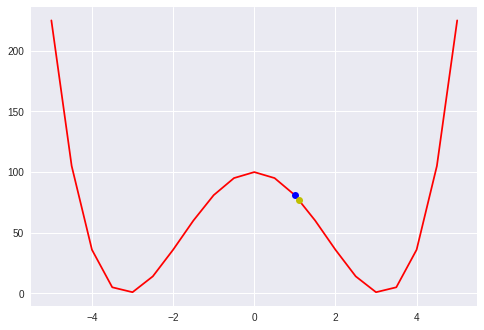

In [86]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-5, 5, 21)
y = pow(x * x - 10, 2)
plt.plot(x, y, 'r')
plt.plot(1, pow(1 * 1 - 10, 2),'bo') 
plt.plot(1.1, pow(1.1 * 1.1 - 10, 2),'yo') 

重复多次前面的更新 x 的过程

In [83]:
import torch

x = torch.Tensor([1.0])
x.requires_grad_(True)
target = torch.Tensor([10.0])
learning_rate = 0.05

for i in range(32):
  print('====')
  y = x * x
  loss = torch.abs(target - y)
  print('y', y, 'target', target, 'loss', loss)
  # Use autograd to compute the backward pass. This call will compute the
  # gradient of loss with respect to all Tensors with requires_grad=True.
  # After this call x.grad will be Tensors holding the gradient
  # of the loss with respect to x.
  loss.backward()
  with torch.no_grad():
    x -= learning_rate * x.grad
    print('updated x', x, 'x.grad', x.grad)
    x.grad.zero_()
    y = x * x
    print('updated y', y)

====
y tensor([ 1.]) target tensor([ 10.]) loss tensor([ 9.])
updated x tensor([ 1.1000]) x.grad tensor([-2.])
updated y tensor([ 1.2100])
====
y tensor([ 1.2100]) target tensor([ 10.]) loss tensor([ 8.7900])
updated x tensor([ 1.2100]) x.grad tensor([-2.2000])
updated y tensor([ 1.4641])
====
y tensor([ 1.4641]) target tensor([ 10.]) loss tensor([ 8.5359])
updated x tensor([ 1.3310]) x.grad tensor([-2.4200])
updated y tensor([ 1.7716])
====
y tensor([ 1.7716]) target tensor([ 10.]) loss tensor([ 8.2284])
updated x tensor([ 1.4641]) x.grad tensor([-2.6620])
updated y tensor([ 2.1436])
====
y tensor([ 2.1436]) target tensor([ 10.]) loss tensor([ 7.8564])
updated x tensor([ 1.6105]) x.grad tensor([-2.9282])
updated y tensor([ 2.5937])
====
y tensor([ 2.5937]) target tensor([ 10.]) loss tensor([ 7.4063])
updated x tensor([ 1.7716]) x.grad tensor([-3.2210])
updated y tensor([ 3.1384])
====
y tensor([ 3.1384]) target tensor([ 10.]) loss tensor([ 6.8616])
updated x tensor([ 1.9487]) x.grad t

In [0]:
y = torch.Tensor([2, 3])
y.requires_grad_(True)
y

tensor([ 2.,  3.])

In [0]:
z = x * y
z.backward(torch.Tensor([1, 1]))

In [0]:
y.backward(torch.Tensor([1,2]))

In [0]:
print(x.grad)
print(y.grad)

tensor([ 2.,  3.])
tensor([ 1.,  2.])


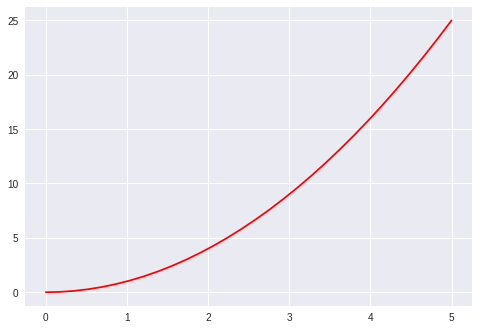

In [0]:
import numpy as np

x = np.linspace(0, 5, 30)
y = x * x
plt.plot(x, y, 'r')

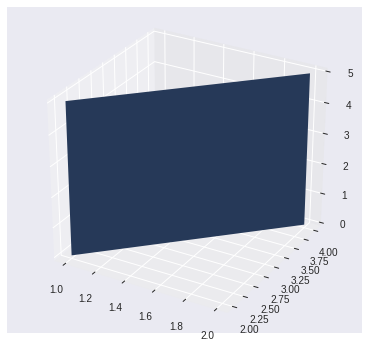

In [0]:
import numpy as np
from matplotlib import cm

X=np.array([1,2])
Y=np.array([2,4])
Z=np.array([[0,0],[4,4],[5,5]])
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# # surface_plot with color grading and color bar
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# cb = fig.colorbar(p, shrink=0.5)